In [0]:
################################################################
# MLP architecture for XOR GATE  hidden layer -1               #
#input layer------>input nodes - x1 & x2                       #
# hidden layer----->hidden nodes - h1 & h2                     #
# output layer------>output nodes - y1                         #
################################################################

In [0]:
import numpy as np
import math
import random as rd
import matplotlib.pyplot as plt
#%matplotlib inline
#import tensorflow

In [0]:
############### Training Data Preparation ##############
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y_xor = np.array([[0],[1],[1],[0]])
y_and = np.array([[0],[0],[0],[1]])
y_or = np.array([[0],[1],[1],[1]])

def get_training_data(X,Y,n):
	noise_x = 0.1
	X = np.repeat(X,[n for i in range(4)],axis=0)
	X = X + np.random.normal(0,noise_x,size=X.shape)

	Y = np.repeat(Y,[n for i in range(4)],axis=0)

	idx = np.random.permutation(len(X))
	X,Y = X[idx],Y[idx]
	return X,Y


In [0]:
#### Building Block of Neural Network ####
###### Hidden Node (Linear block) #######
def linear_block(input_to_node,weight,bias):
    node_output =np.dot(input_to_node,weight) +bias
    return node_output
## Activation Functions and Their Derivatives ##########
#sigmoid function = 1/(1+exp(-x))#############################################################################
def sigmoid(k):   
    inter=np.exp(-1*k)
    final=1/(1+inter)
    return final

# derivative of sigmoid ############
def der_sigmoid(out):
    result = out * (1-out)
    return result
  
# Relu               ########################
def relu(x):    
    return np.maximum(x, 0)
def dRelu(z):
    return np.where(z <= 0, 0, 1)

# TanH and it's derivative #########
def tanh(x):
    return np.tanh(x)

def tanh_deriv(x):
    return 1.0 - np.tanh(x)**2

In [0]:
### Neural Network - Forward pass 
#### Intialization (2-layer network) #####
####### You can configure the NetworK nodes here##### 
Input_data_dimension = 2
output_node1 = 2
output_node2 = 1
####### Layer 1 #######
Weight_1=np.random.rand(Input_data_dimension,output_node1)
# bias initailization
bias_1=np.zeros(output_node1)
####### Layer 2 #######
Weight_2 =np.random.rand(output_node1,output_node2)
# bias initialization
bias_2=np.zeros(output_node2)

In [0]:
###### This is the code for 2 layer Network #########
####### Network Architecture is configurable ######
def forward_pass(Data,Weight_1,bias_1,Weight_2,bias_2):
     #print(output_node1)
     Linear_1 = linear_block(Data,Weight_1,bias_1)
     
     Hidden_output_1 = sigmoid(Linear_1)
     Linear_2 = linear_block(Hidden_output_1,Weight_2,bias_2)
     Output_final =Linear_2
     #print(Output_final.shape)
     return Output_final,Hidden_output_1




In [0]:
############### Back propagation to update the weights #############
def Back_propagation(Data,Error,Intial_Weight_1,Intial_bias_1,Intial_Weight_2,Intial_bias_2,Hidden_output_1,Output_final): 
    #learning_rate=0.01
    ############ We used backpropagation equat          ions derived in the class for mean squared error loss and sigmoid activation #####
    delta_Weight_2 =np.dot(Hidden_output_1.T, Error)
    #delta_Weight_2 =np.dot(Hidden_output_1.T, np.multiply(Error,Output_final))
    delta_bias_2 = np.sum(Error,axis=0)

    delta_h = np.multiply(np.dot(Error, Intial_Weight_2.T),der_sigmoid(Hidden_output_1)) 

    delta_Weight_1 = np.dot( Data.T,delta_h)

    delta_bias_1 = np.sum(delta_h,axis=0)   

    ######################################################################
    #   updating parameters                                              #
    ######################################################################
    learning_rate=0.01
    Updated_Weight_2 = Intial_Weight_2 - learning_rate * delta_Weight_2
    Updated_bias_2 = Intial_bias_2 - learning_rate * delta_bias_2
    Updated_Weight_1 =  Intial_Weight_1- learning_rate * delta_Weight_1
    Updated_bias_1 = Intial_bias_1 - learning_rate * delta_bias_1
    return Updated_Weight_1,Updated_bias_1,Updated_Weight_2,Updated_bias_2

In [0]:
def train(Data,Label,Test_data,Test_labels,Weight_1,Weight_2,bias_1,bias_2,epoch):
    Total_train_loss=[]
    Total_test_loss=[]
    Number_of_datapoints =Data.shape[0]
    Number_of_test_datapoints =Test_data.shape[0]
    for i in range(epoch):
        #### forward pass ##################################################
        Output_final,Hidden_output_1 = forward_pass(Data,Weight_1,bias_1,Weight_2,bias_2)
        ############### Computing the loss function #################
        Squared_error_loss = np.sum(0.5*(Output_final-Label)**2)
        Mean_squared_error_loss = Squared_error_loss / Number_of_datapoints
        Error = Output_final- Label
        #print(Error.shape)
        Weight_1,bias_1, Weight_2,bias_2 = Back_propagation(Data,Error,Weight_1,bias_1,Weight_2,bias_2,Hidden_output_1,Output_final)
        ############ Validation loss computation #######
        
        Output_Test,Hidden_output_val = forward_pass(Test_data,Weight_1,bias_1,Weight_2,bias_2)
        

        Test_loss=np.sum(0.5*(Test_labels-Output_Test)**2)
        Test_loss/=Number_of_test_datapoints
        Total_train_loss=np.append(Total_train_loss,Mean_squared_error_loss)
        Total_test_loss=np.append(Total_test_loss,Test_loss)
    return Total_train_loss,Total_test_loss,Weight_1,Weight_2,bias_1,bias_2

(700,)
(700,)


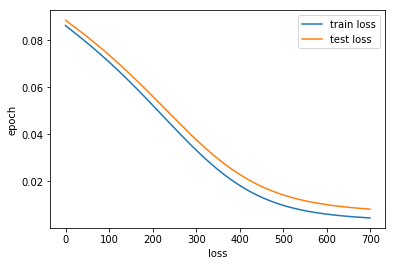

In [13]:
######## training and validation loss ########
epoch=700
###### Number of data point you can configure #########
Number_of_data_points  = 10
Number_of_test_data_points = 10
##### You can change any Gate configuration here #######
y = y_xor
Data,Label = get_training_data(x,y,Number_of_data_points)
#print(Data.shape)
#print(label.shape)
Test_data,Test_labels = get_training_data(x,y,Number_of_test_data_points)
Total_train_loss,Total_test_loss,Weight_1,Weight_2,bias_1,bias_2 =train(Data,Label,Test_data,Test_labels,Weight_1,Weight_2,bias_1,bias_2,epoch)
print(Total_test_loss.shape)
print(Total_train_loss.shape)
plt.plot(range(epoch),Total_train_loss,label='train loss')
plt.plot(range(epoch),Total_test_loss,label='test loss')
plt.xlabel('loss')
plt.ylabel('epoch')
leg = plt.legend(loc="upper right")


In [14]:
### See the prediction ##########
Prediction = np.array([[0.0,0.0], [0.0, 1.0], [1.0,0.0], [1.0,1.0]])
Predicted_outputs,Hidden_output_val = forward_pass(Prediction,Weight_1,bias_1,Weight_2,bias_2)
print(Predicted_outputs)
Y_test = np.where(Predicted_outputs>0.5,1,0)
print(Y_test)


[[0.06115181]
 [0.97672615]
 [0.98235937]
 [0.12356252]]
[[0]
 [1]
 [1]
 [0]]


In [15]:
########### Accuracy computation #################
X_test,Y_test = get_training_data(x,y,15)
Test_outputs,Hidden_output_val = forward_pass(X_test,Weight_1,bias_1,Weight_2,bias_2)
#############
Y_test_2 = np.where(Y_test>0.5,1,0)
Y_test = np.where(Test_outputs>0.5,1,0)
print(np.sum(Y_test_2==Y_test)/np.float(len(Y_test)))
#print(Y_test)
#print(Test_outputs)

1.0
